<a href="https://www.kaggle.com/code/mahyararani/diabetes-classification?scriptVersionId=106155391" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="color:white;background-color:#e90045;padding:3%;border-radius:150px 150px;font-size:2em;text-align:center"> <font color="White" size=+5 face="Lucida Calligraphy"><div style="align:center: justify">Diabetes Binary Classification</font></div>
   

<font color="Blue"><h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Blue"> Predicting Diabetes 💔 using Machine Learning  </h1>

    
<center><img src='https://media3.giphy.com/media/1XfikeuKxr82jLnVpe/giphy.gif?cid=6c09b952ub87mp0os16qkhu11zuca496ntt5e3oytrwmwjgl&rid=giphy.gif&ct=s'></center>

# Bianry Classification

In [1]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

diabetes = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### EDA and Setting Target

In [2]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

label = 'Outcome'

X, y = diabetes[features].values, diabetes[label].values

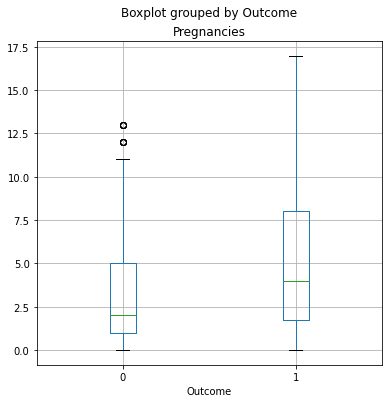

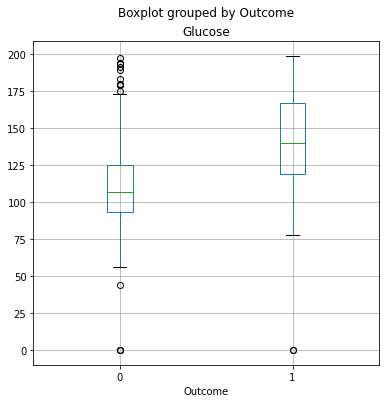

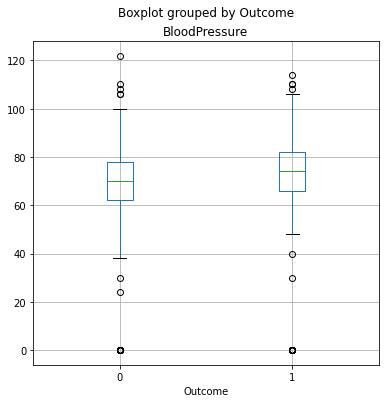

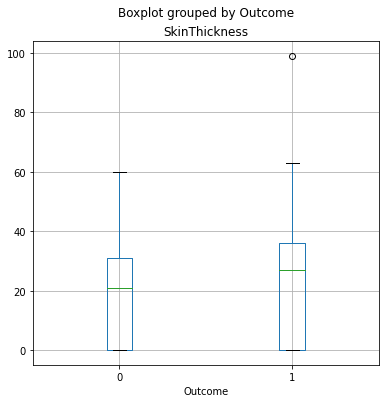

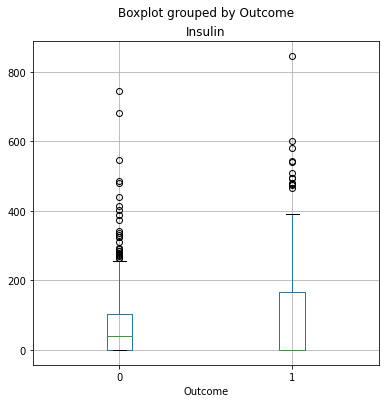

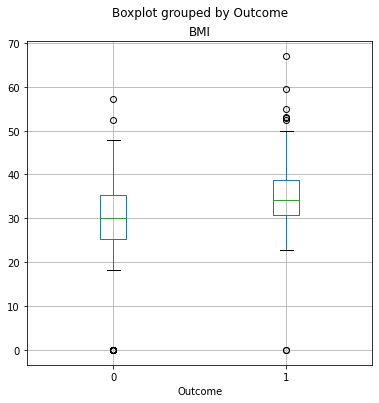

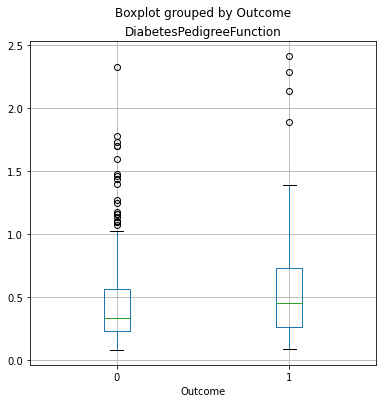

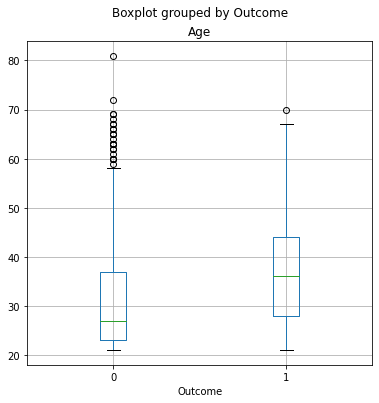

In [3]:
for col in features:
    diabetes.boxplot(column = col, by='Outcome', figsize = (6,6))

For some of the features, there is a noticeable difference in distribution foe each label value. In particular, **Pregnancies** and **Age** show markedly different fr diabetic patirents than for non-diabetic patients. These features may help predict whether or not a patient is diabetic.

# Split the Data

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .30, random_state = 0)

print('Training cases: %d\n Test cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 537
 Test cases: 231


However, The number of record is not ideal for a ML classification algorithm, we try to continue.

In [5]:
from sklearn.linear_model import LogisticRegression

# set regularization rate
reg = 0.01

# train a logistic regression model
model = LogisticRegression(C=1/reg, solver='liblinear').fit(X_train, y_train)

predictions = model.predict(X_test)
print('predicted labels:', predictions)
print('Actual labels:', y_test)

predicted labels: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 1 0 0 0 0 0]
Actual labels: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 0 1 1 0 0 0]


In [6]:
from sklearn.metrics import accuracy_score

print('Accuracy:', accuracy_score(y_test, predictions))

Accuracy: 0.7792207792207793


In [7]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231



In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

[[141  16]
 [ 35  39]]


The recal value is relatively low and means our classification did not very sensitive for identifing the elevant instances.

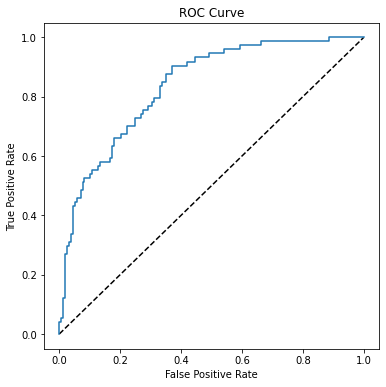

In [9]:
from sklearn.metrics import roc_curve


y_scores = model.predict_proba(X_test)

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

# plot ROC curve
fig = plt.figure(figsize=(6,6))

plt.plot([0,1], [0,1], 'k--')

# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

We have not an ideal RUC curve and it could be because of the limited number of cases in the dataset. 

In [10]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.8357720778102944


# Improving the Results
## Perform preprocessing in a pipeline

In this case, the ROC curve and its AUC indicate that the model performs better than a random guess which is not bad considering we performed very little preprocessing of the data.

In practice, it's common to perform some preprocessing of the data to make it easier for the algorithm to fit a model to it. There's a huge range of preprocessing transformations you can perform to get your data ready for modeling, but we'll limit ourselves to a few common techniques:

- Scaling numeric features so they're on the same scale. This prevents features with large values from producing coefficients that disproportionately affect the predictions.
- Encoding categorical variables. For example, by using a one hot encoding technique you can create individual binary (true/false) features for each possible category value.

In [11]:
# Train the model

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define preprocessing for numeric columns (normalize them)
numeric_features = [0, 1, 2, 3, 4, 5, 6]
numeric_transformer = Pipeline(steps = [('scaler', StandardScaler())])

# Define preprocessing for categorical feature (Age)
categorical_feature = [7]
categorical_transformer = Pipeline(steps= [('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers = [('num', numeric_transformer, numeric_features),
                                                 ('cat', categorical_transformer, categorical_feature)])

# Create preprocessong and training pipeline
pipeline = Pipeline(steps = [('preprocessor', preprocessor),
                             ('logregressor', LogisticRegression(C=1/reg, solver = 'liblinear'))])

# fit the pipeline ro train a logistic regression model on the training set
model = pipeline.fit(X_train, (y_train))
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


Confusion Matrix:
 [[135  22]
 [ 35  39]] 

Accuracy: 0.7532467532467533
AUC: 0.8163195042175934


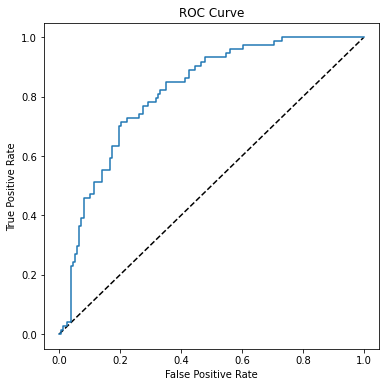

In [12]:
# Get predictions from test data
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Not actual improvement in AUC. So normalizing the features did not helped us in this case.

# Try a Different Algorithm

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', RandomForestClassifier(n_estimators=100))])

# fit the pipeline to train a random forest model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor', RandomForestClassifier())])


Confusion Matrix:
 [[141  16]
 [ 34  40]] 

Accuracy: 0.7835497835497836

AUC: 0.8261318643484248


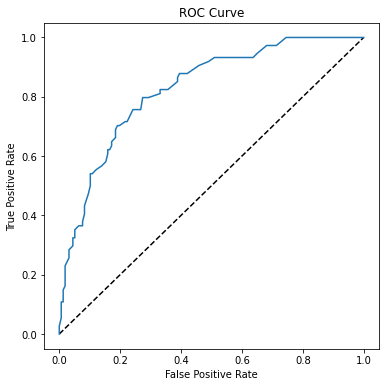

In [14]:
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))

auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Summary

We perform a logistic regression on this dataset and measure the accuracy at first. Then tried to normalized and perform a better preprocessing using pipline and wierdly, it did not improve our result and we could expect that because of the limited number of train set. Also we could conclude that Scaling, Standardizing and Normalizing are not always helpful, especially when the dataset does not have enough data for training.